In [0]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
from statsmodels.compat import lzip
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import matplotlib.pyplot as plt

In [0]:
df = pd.read_csv('Gender_StatsData.csv')

In [4]:
df['full_count'] = df.apply(lambda x: x.count(), axis=1)
df = df.drop(['Country Code','Indicator Code','Unnamed: 63'],axis=1)

df.shape

(140179, 62)

In [0]:
df.head()

In [0]:
def valuecounts(a,b,c):
  counts = a[b].value_counts()
  counts = counts[counts>c]
  a1 = a[a[b].isin(counts.index)]
  return a1



In [0]:
a1 = valuecounts(df,'Country Name',50)
#a1['Country Name'].value_counts()

In [6]:
df = df[df['full_count']>=30]
df.shape

(24174, 62)

In [0]:
df['Indicator Name'].value_counts()

In [7]:
df = valuecounts(df,'Indicator Name',179)
df.shape

(19581, 62)

In [0]:
df['Indicator Name'].nunique()

87

In [0]:
df['Country Name'].value_counts()

In [8]:
df = valuecounts(df,'Country Name',59)
df.shape

(19133, 62)

In [9]:
counts3 = df['Country Name'].value_counts()
counts3 = counts3[counts3<76]
counts3 = counts3[counts3>70]
df = df[df['Country Name'].isin(counts3.index)]
df.shape


(3500, 62)

In [10]:
to_drop = ['Eritrea',                                              
'Timor-Leste' ,                                         
'Liberia'    ,                                          
'Montenegro' ,
'IDA blend',
'IBRD only',
'Caribbean small states'   ,                            
'Post-demographic dividend' ,                           
'New Caledonia'        ,                                
'Europe & Central Asia (excluding high income)',
'Pacific island small states'   ,                       
'French Polynesia'    ,                                 
'Middle East & North Africa',
'Serbia','Latin America & Caribbean (IDA & IBRD)',
'Pre-demographic dividend','IDA only','Early-demographic dividend',
'East Asia & Pacific (excluding high income)','Upper middle income','Low & middle income']

df = df[~df['Country Name'].isin(to_drop)]


df.shape


(1970, 62)

In [11]:
df.rename(columns = {'Country Name':'Region'},inplace=True)

df.Region.value_counts()


World                                                75
High income                                          73
Latin America & Caribbean (excluding high income)    73
Sub-Saharan Africa (IDA & IBRD)                      73
Heavily indebted poor countries (HIPC)               73
OECD members                                         73
East Asia & Pacific (IDA & IBRD)                     73
South Asia (IDA & IBRD)                              73
Sub-Saharan Africa (excluding high income)           73
Euro area                                            73
Least developed countries: UN classification         73
East Asia & Pacific                                  73
North America                                        73
Europe & Central Asia                                73
Low income                                           73
Late-demographic dividend                            73
Central Europe and the Baltics                       73
IDA total                                       

In [0]:
df['Indicator Name'].value_counts()

In [12]:
df = valuecounts(df,'Indicator Name',26)
df.shape


(1890, 62)

In [13]:
to_drop2 = ['Contributing family workers, male (% of male employment) (modeled ILO estimate)',
'Contributing family workers, female (% of female employment) (modeled ILO estimate)',
'Employers, male (% of male employment) (modeled ILO estimate)' ,
'Age dependency ratio (% of working-age population)',
'Vulnerable employment, male (% of male employment) (modeled ILO estimate)',
'Labor force participation rate, male (% of male population ages 15-64) (modeled ILO estimate)',
'Population ages 15-64, total',
'Employment in industry, male (% of male employment) (modeled ILO estimate)',
'Wage and salaried workers, male (% of male employment) (modeled ILO estimate)',
'Life expectancy at birth, male (years)',
'Employment to population ratio, ages 15-24, male (%) (modeled ILO estimate)',
'Employment in agriculture, male (% of male employment) (modeled ILO estimate)',
'Self-employed, male (% of male employment) (modeled ILO estimate)']

df = df[~df['Indicator Name'].isin(to_drop2)]
df['Indicator Name'].value_counts()

Unemployment, youth male (% of male labor force ages 15-24) (modeled ILO estimate)                   27
Wage and salaried workers, female (% of female employment) (modeled ILO estimate)                    27
GNI per capita, PPP (current international $)                                                        27
Death rate, crude (per 1,000 people)                                                                 27
Labor force, total                                                                                   27
Prevalence of anemia among women of reproductive age (% of women ages 15-49)                         27
Own-account workers, female (% of female employment) (modeled ILO estimate)                          27
School enrollment, primary, male (% gross)                                                           27
Vulnerable employment, female (% of female employment) (modeled ILO estimate)                        27
GDP (current US$)                                               

In [14]:
to_keep = [
    'Labor force participation rate, female (% of female population ages 15-64) (modeled ILO estimate)',
    'Maternal mortality ratio (modeled estimate, per 100,000 live births)',
    'Prevalence of overweight, female (% of female adults)',
    'Primary education, pupils (% female)',
    'Adolescent fertility rate (births per 1,000 women ages 15-19)',
    'School enrollment, primary, female (% gross)',
    'Fertility rate, total (births per woman)',
    'Adolescent fertility rate (births per 1,000 women ages 15-19)',
    'Employers, female (% of female employment) (modeled ILO estimate)',
    'Ratio of female to male youth unemployment rate (% ages 15-24) (modeled ILO estimate)',
    'Employment to population ratio, 15+, female (%) (modeled ILO estimate)',
    'Vulnerable employment, female (% of female employment) (modeled ILO estimate)',
    'Fertility rate, total (births per woman)',
    'Unemployment, youth female (% of female labor force ages 15-24) (modeled ILO estimate)',
    'Prevalence of anemia among women of reproductive age (% of women ages 15-49)',
    'Self-employed, female (% of female employment) (modeled ILO estimate)',
    'Own-account workers, female (% of female employment) (modeled ILO estimate)',
    'Number of maternal deaths',
    'Population, female (% of total)',
    'Population ages 15-64, female'   ,                                                            
    'Ratio of female to male labor force participation rate (%) (modeled ILO estimate)'   ,                 
    'Life expectancy at birth, female (years)'   ,                                                         
    'Labor force, female (% of total labor force)'   ,                                                     
    'Labor force participation rate, female (% of female population ages 15-64) (modeled ILO estimate)'   ,
    'Maternal mortality ratio (modeled estimate, per 100,000 live births)',
    'Immunization, measles (% of children ages 12-23 months)',
    'GNI per capita, PPP (current international $)',
    'Death rate, crude (per 1,000 people)'
    
]

df = df[df['Indicator Name'].isin(to_keep)]
df['Indicator Name'].nunique()

24

In [0]:
df['Indicator Name'].value_counts()

In [0]:
df.shape

(648, 62)

In [15]:
# dropping columns from 1960 to 1989
df1 = df.drop(df.iloc[:,2:32],axis=1)
df1.head()


,Region,Indicator Name,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,full_count
6,Arab World,"Adolescent fertility rate (births per 1,000 wo...",69.287035,68.020174,67.108673,65.053264,62.979722,60.718474,58.587535,56.425224,55.581968,54.784055,54.032326,53.187505,52.372919,51.929831,51.529752,51.165978,50.766666,50.413037,50.159997,49.924648,49.705138,49.522584,49.340230,48.925896,48.474282,47.946223,47.266617,46.543283,NaN,62
48,Arab World,"Death rate, crude (per 1,000 people)",7.970246,7.780692,7.644617,7.465960,7.291314,7.092940,6.935355,6.791591,6.666936,6.559099,6.467707,6.388491,6.316960,6.247486,6.176478,6.103109,6.029161,5.957044,5.894389,5.841634,5.797548,5.758391,5.719486,5.678328,5.634164,5.588410,5.542442,5.499142,NaN,62
82,Arab World,"Employers, female (% of female employment) (mo...",NaN,1.895174,1.988144,1.950090,2.029737,2.269749,2.166611,1.990249,2.273894,2.360037,1.983438,2.526244,2.273367,1.958235,2.013741,1.872992,1.651973,1.850323,2.026252,1.917185,1.759822,1.715847,1.671481,1.558009,1.574689,1.477478,1.566784,1.541135,1.561642,32
90,Arab World,"Employment to population ratio, 15+, female (%...",NaN,16.198282,16.288906,16.111547,16.243907,16.174802,16.326882,16.092926,15.926986,16.310199,16.096428,16.068465,15.599957,15.840918,15.976079,16.054489,16.339762,16.993805,16.726979,16.556835,16.616396,16.601332,16.658526,16.924549,16.870909,16.654917,16.752851,16.726855,16.734726,32
116,Arab World,"Fertility rate, total (births per woman)",5.202061,5.040840,4.896682,4.731346,4.569543,4.404102,4.261059,4.129017,4.009007,3.902371,3.809781,3.730241,3.662147,3.604335,3.555602,3.516902,3.488844,3.471495,3.463819,3.462588,3.464072,3.462471,3.454316,3.436522,3.407631,3.368495,3.321159,3.270962,NaN,62


In [0]:
df1.isnull().sum()

In [0]:
df1['1990'].fillna(df1['1991'], inplace=True)
df1['2016'].fillna(df1['2015'], inplace=True)
df1['2017'].fillna(df1['2016'], inplace=True)
df1['2018'].fillna(df1['2017'], inplace=True)
#df1.isnull().sum()

In [0]:
df1['Region'].value_counts()

In [0]:
df1 = df1.drop('full_count',axis=1)

In [0]:
def setting_frame(a):
  a = a.set_index('Indicator Name').drop('Region',axis=1).T
  a = a.reset_index()
  a.rename(columns={'index':'Year'},inplace=True)
  return a

In [18]:
Black_Africa = df1[df1['Region']=='Sub-Saharan Africa']

Black_Africa = setting_frame(Black_Africa)
Black_Africa.head()

Indicator Name,Year,"Adolescent fertility rate (births per 1,000 women ages 15-19)","Death rate, crude (per 1,000 people)","Employers, female (% of female employment) (modeled ILO estimate)","Employment to population ratio, 15+, female (%) (modeled ILO estimate)","Fertility rate, total (births per woman)","GNI per capita, PPP (current international $)","Immunization, measles (% of children ages 12-23 months)","Labor force participation rate, female (% of female population ages 15-64) (modeled ILO estimate)","Labor force, female (% of total labor force)","Life expectancy at birth, female (years)","Maternal mortality ratio (modeled estimate, per 100,000 live births)",Number of maternal deaths,"Own-account workers, female (% of female employment) (modeled ILO estimate)","Population ages 15-64, female","Population, female (% of total)",Prevalence of anemia among women of reproductive age (% of women ages 15-49),"Prevalence of overweight, female (% of female adults)","Primary education, pupils (% female)",Ratio of female to male labor force participation rate (%) (modeled ILO estimate),Ratio of female to male youth unemployment rate (% ages 15-24) (modeled ILO estimate),"School enrollment, primary, female (% gross)","Self-employed, female (% of female employment) (modeled ILO estimate)","Unemployment, youth female (% of female labor force ages 15-24) (modeled ILO estimate)","Vulnerable employment, female (% of female employment) (modeled ILO estimate)"
0,1990,139.561692,16.223780,1.319809,56.434316,6.331480,1598.834960,57.269665,62.021711,44.862968,51.698884,987.0,223000.0,47.248298,132841781.0,50.277433,51.116239,20.963487,45.000408,80.240818,97.025032,65.468407,87.334090,14.283821,86.014352
1,1991,138.295206,16.176395,1.319809,56.434316,6.265308,1632.333393,53.934845,62.052352,44.899770,51.703727,975.0,225000.0,47.248298,136687018.0,50.282847,50.485356,21.535577,45.220230,80.290443,97.025032,66.825951,87.334090,14.283821,86.014352
2,1992,137.031682,16.106228,1.337972,56.474240,6.200204,1584.589057,50.698312,62.106530,44.957133,51.700630,965.0,227000.0,47.483272,140781342.0,50.288612,49.892740,22.107213,45.374561,80.400608,96.804235,66.840630,87.182210,14.244405,85.844393
3,1993,136.118332,16.013988,1.354474,56.366462,6.137979,1581.640463,51.439515,62.201573,45.053052,51.695723,956.0,230000.0,47.557100,145095989.0,50.293517,49.317224,22.682858,45.355438,80.633516,97.276408,67.639717,87.147756,14.704355,85.793421
4,1994,135.180268,15.905379,1.373302,56.414102,6.079286,1594.933237,55.035058,62.319895,45.164877,51.688429,944.0,232000.0,47.625240,149597705.0,50.296135,48.787898,23.255377,45.403580,80.934653,97.112378,67.933571,87.029400,14.832840,85.656013


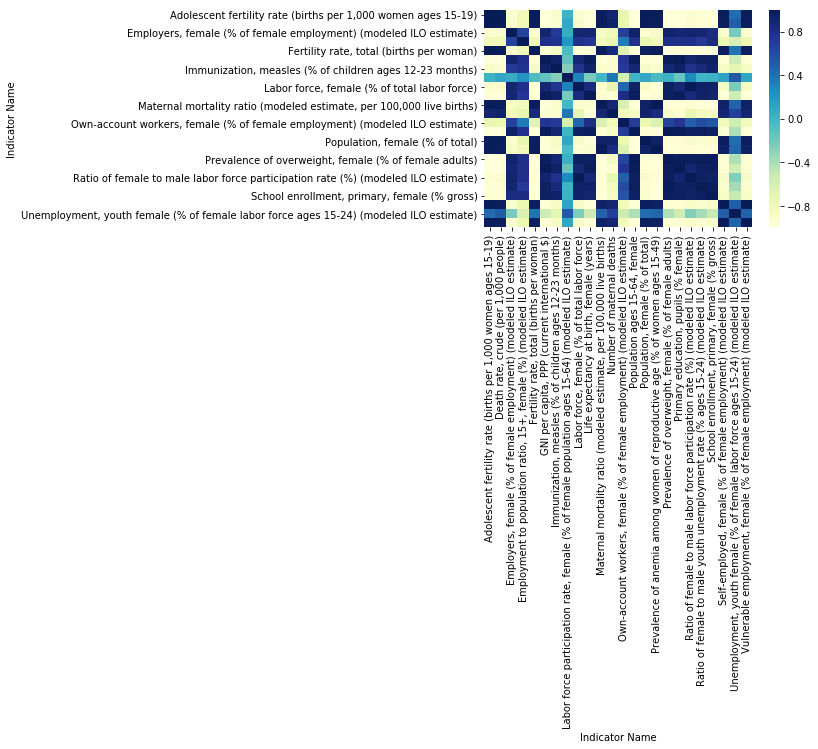

In [19]:
import seaborn as sns
sns.heatmap((Black_Africa.corr()), cmap='YlGnBu')

In [20]:
Black_Africa.corr()

Indicator Name,"Adolescent fertility rate (births per 1,000 women ages 15-19)","Death rate, crude (per 1,000 people)","Employers, female (% of female employment) (modeled ILO estimate)","Employment to population ratio, 15+, female (%) (modeled ILO estimate)","Fertility rate, total (births per woman)","GNI per capita, PPP (current international $)","Immunization, measles (% of children ages 12-23 months)","Labor force participation rate, female (% of female population ages 15-64) (modeled ILO estimate)","Labor force, female (% of total labor force)","Life expectancy at birth, female (years)","Maternal mortality ratio (modeled estimate, per 100,000 live births)",Number of maternal deaths,"Own-account workers, female (% of female employment) (modeled ILO estimate)","Population ages 15-64, female","Population, female (% of total)",Prevalence of anemia among women of reproductive age (% of women ages 15-49),"Prevalence of overweight, female (% of female adults)","Primary education, pupils (% female)",Ratio of female to male labor force participation rate (%) (modeled ILO estimate),Ratio of female to male youth unemployment rate (% ages 15-24) (modeled ILO estimate),"School enrollment, primary, female (% gross)","Self-employed, female (% of female employment) (modeled ILO estimate)","Unemployment, youth female (% of female labor force ages 15-24) (modeled ILO estimate)","Vulnerable employment, female (% of female employment) (modeled ILO estimate)"
Indicator Name,,,,,,,,,,,,,,,,,,,,,,,,
"Adolescent fertility rate (births per 1,000 women ages 15-19)",1.000000,0.994350,-0.935504,-0.782391,0.996429,-0.990681,-0.893536,0.021941,-0.935174,-0.976033,0.984132,0.893681,-0.705642,-0.998870,0.981314,0.978017,-0.995337,-0.983630,-0.951281,-0.969585,-0.955708,0.976670,0.435631,0.978828
"Death rate, crude (per 1,000 people)",0.994350,1.000000,-0.906949,-0.784753,0.984227,-0.997879,-0.930380,0.107132,-0.902599,-0.988082,0.984657,0.930347,-0.736304,-0.990004,0.979412,0.974378,-0.987194,-0.995022,-0.922119,-0.963138,-0.961286,0.976144,0.513237,0.975961
"Employers, female (% of female employment) (modeled ILO estimate)",-0.935504,-0.906949,1.000000,0.654337,-0.936111,0.910581,0.716020,0.068922,0.895074,0.902695,-0.879984,-0.781755,0.678829,0.942784,-0.941557,-0.877597,0.921571,0.883785,0.908585,0.902513,0.825327,-0.925383,-0.222257,-0.936904
"Employment to population ratio, 15+, female (%) (modeled ILO estimate)",-0.782391,-0.784753,0.654337,1.000000,-0.789736,0.790363,0.767152,0.217316,0.795221,0.735608,-0.819607,-0.715847,0.365635,0.782371,-0.731435,-0.798460,0.795369,0.790946,0.804634,0.723071,0.828028,-0.744756,-0.623262,-0.741483
"Fertility rate, total (births per woman)",0.996429,0.984227,-0.936111,-0.789736,1.000000,-0.977877,-0.873068,-0.052391,-0.960835,-0.954874,0.985586,0.855776,-0.660050,-0.996464,0.965971,0.984775,-0.998359,-0.970216,-0.972141,-0.973764,-0.958577,0.965010,0.392540,0.968124
"GNI per capita, PPP (current international $)",-0.990681,-0.997879,0.910581,0.790363,-0.977877,1.000000,0.928985,-0.124538,0.889635,0.991734,-0.976721,-0.940938,0.748041,0.986861,-0.982301,-0.963209,0.980062,0.993847,0.910970,0.952714,0.950057,-0.979051,-0.531540,-0.978945
"Immunization, measles (% of children ages 12-23 months)",-0.893536,-0.930380,0.716020,0.767152,-0.873068,0.928985,1.000000,-0.271179,0.763464,0.922744,-0.916620,-0.930711,0.711416,0.881598,-0.867657,-0.898594,0.888648,0.939543,0.785582,0.859252,0.916031,-0.876912,-0.688135,-0.868514
"Labor force participation rate, female (% of female population ages 15-64) (modeled ILO estimate)",0.021941,0.107132,0.068922,0.217316,-0.052391,-0.124538,-0.271179,1.000000,0.310718,-0.223218,-0.010656,0.389090,-0.591280,0.002967,0.102642,-0.035773,0.035875,-0.151412,0.275222,0.015633,0.021659,0.127075,0.529220,0.111454
"Labor force, female (% of total labor force)",-0.935174,-0.902599,0.895074,0.795221,-0.960835,0.889635,0.763464,0.310718,1.000000,0.838324,-0.941483,-0.694533,0.463958,0.939954,-0.87

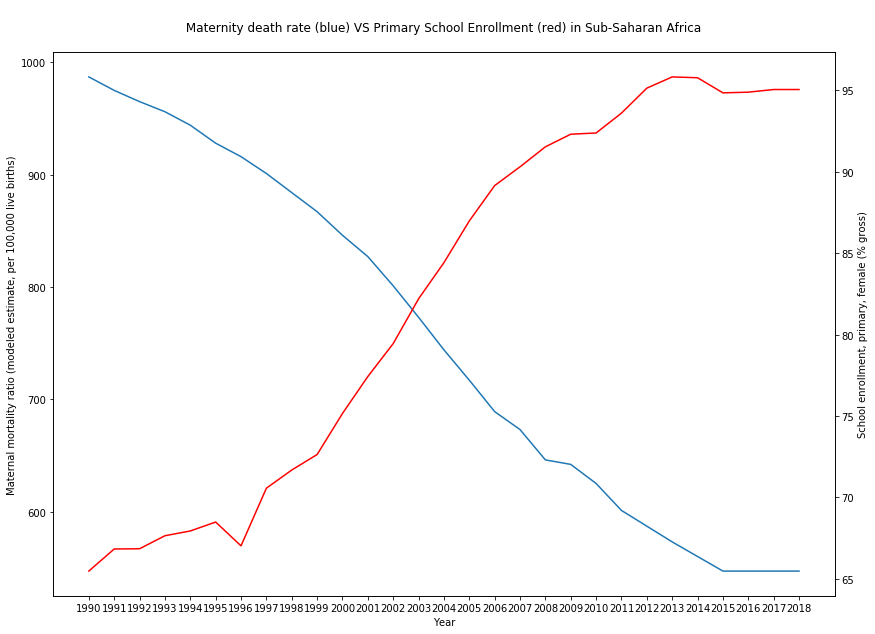

In [21]:
fig = plt.figure(figsize = (14, 10)) 
ax = fig.add_subplot(111)
ax2 = ax.twinx()
sns.lineplot(x='Year',y='School enrollment, primary, female (% gross)',data=Black_Africa, ax = ax2, color = 'red')

sns.lineplot(x='Year',y='Maternal mortality ratio (modeled estimate, per 100,000 live births)',data=Black_Africa, ax = ax)
plt.title('\n Maternity death rate (blue) VS Primary School Enrollment (red) in Sub-Saharan Africa \n')

plt.show()

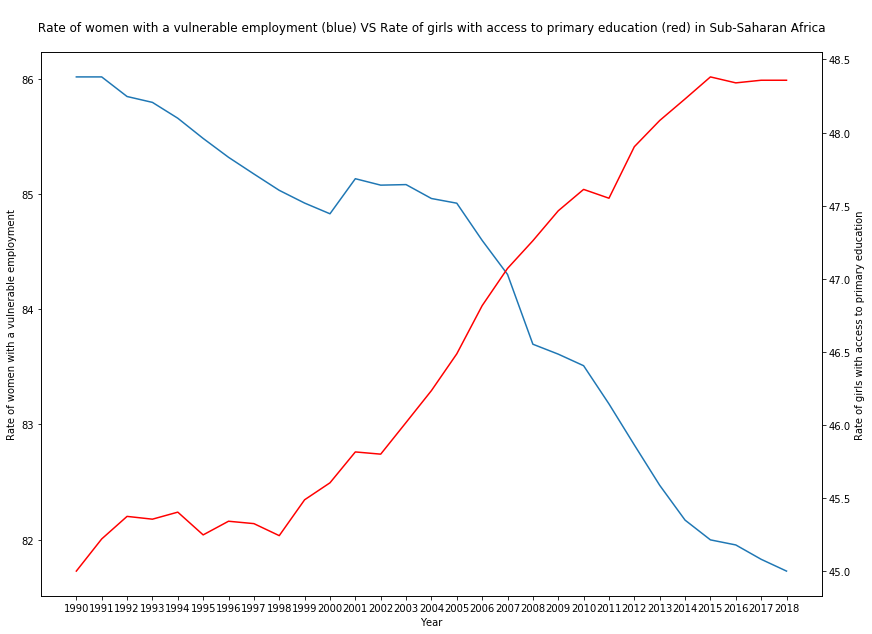

In [22]:
#Adolescent fertility rate (births per 1,000 women ages 15-19)
#Primary education, pupils (% female)

Black_Africa.rename(columns={'Vulnerable employment, female (% of female employment) (modeled ILO estimate)':
                     'Rate of women with a vulnerable employment','Primary education, pupils (% female)':
                            'Rate of girls with access to primary education'}, inplace=True)

fig = plt.figure(figsize = (14, 10)) 
ax = fig.add_subplot(111)
ax2 = ax.twinx()
sns.lineplot(x='Year',y='Rate of girls with access to primary education',data=Black_Africa, ax = ax2, color = 'red')

sns.lineplot(x='Year',y='Rate of women with a vulnerable employment',data=Black_Africa, ax = ax)
plt.title('\n Rate of women with a vulnerable employment (blue) VS Rate of girls with access to primary education (red) in Sub-Saharan Africa \n')

plt.show()

In [0]:
OECD = df1[df1['Region']=='OECD members']
OECD = setting_frame(OECD)
OECD.rename(columns={'Employers, female (% of female employment) (modeled ILO estimate)':
                     'Rate of female employers in %'}, inplace=True)




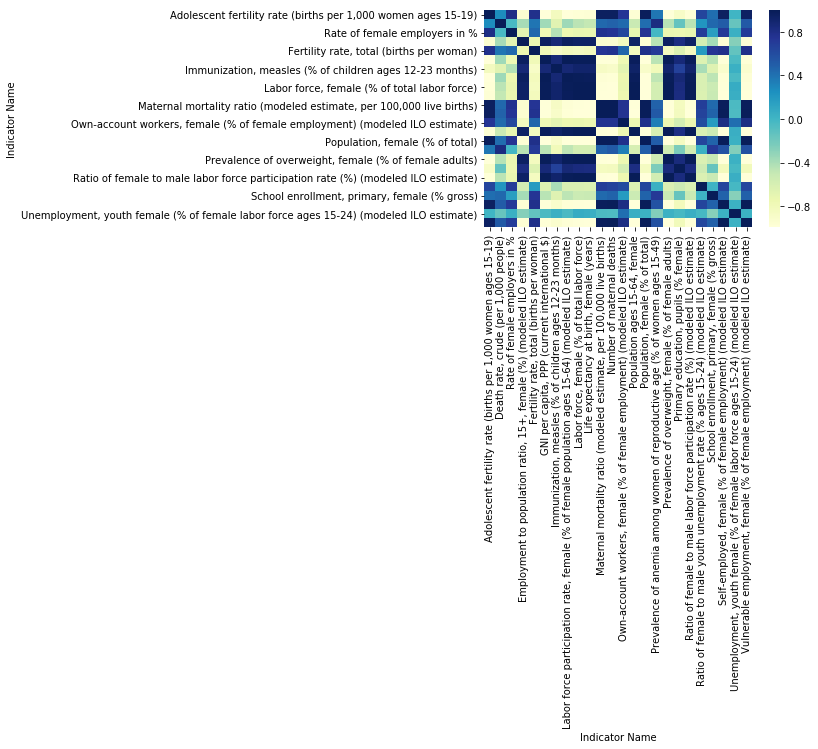

In [24]:
sns.heatmap((OECD.set_index('Year')).corr(), cmap='YlGnBu')

In [0]:
OECD.set_index('Year').corr()

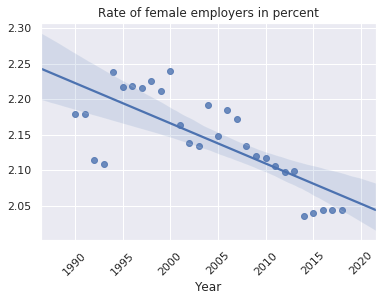

In [23]:
sns.set()
OECD.Year = pd.to_numeric(OECD.Year)
sns.regplot(x='Year',y='Rate of female employers in %', data=OECD, fit_reg=True)
plt.xticks(rotation = 45)
plt.title('Rate of female employers in percent \n')
plt.ylabel("")
plt.show()

No handles with labels found to put in legend.


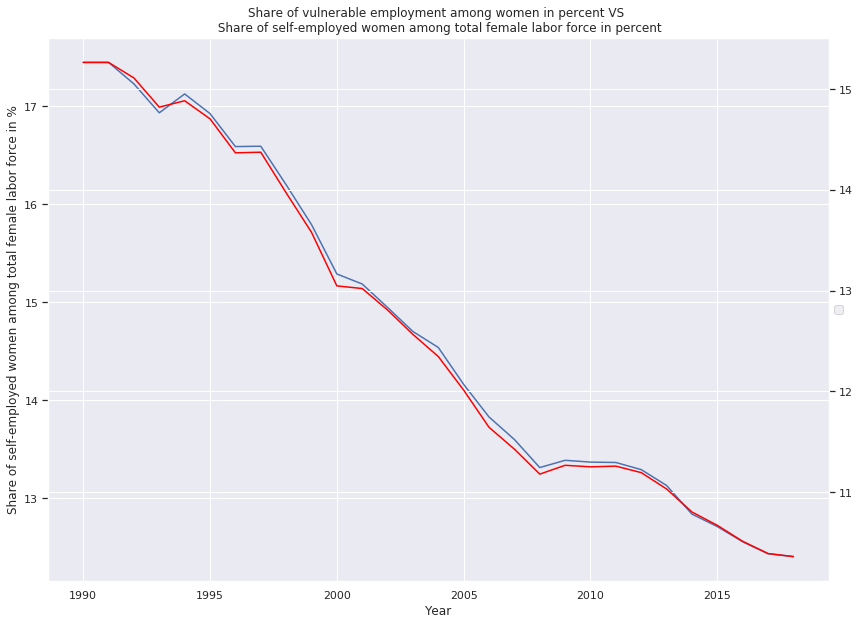

In [29]:
OECD.rename(columns = {'Vulnerable employment, female (% of female employment) (modeled ILO estimate)':'Share of vulnerable employment among women in %',
                      'Self-employed, female (% of female employment) (modeled ILO estimate)':'Share of self-employed women among total female labor force in %'}, inplace=True)
fig = plt.figure(figsize = (14, 10)) 
ax = fig.add_subplot(111)
ax2 = ax.twinx()
sns.lineplot(x='Year',y='Share of vulnerable employment among women in %',data=OECD, ax = ax2, color = 'red')
plt.xticks(rotation = 75)

sns.lineplot(x='Year',y='Share of self-employed women among total female labor force in %',data=OECD, ax = ax)
plt.title('Share of vulnerable employment among women in percent VS \n Share of self-employed women among total female labor force in percent')
plt.ylabel('')
plt.show()

In [0]:
high_income = df1[df1.Region=='High income']
low_income = df1[df1.Region=='Low income']
middle_income = df1[df1.Region=='Middle income']

In [0]:
high_income = setting_frame(high_income)
middle_income = setting_frame(middle_income)
low_income = setting_frame(low_income)


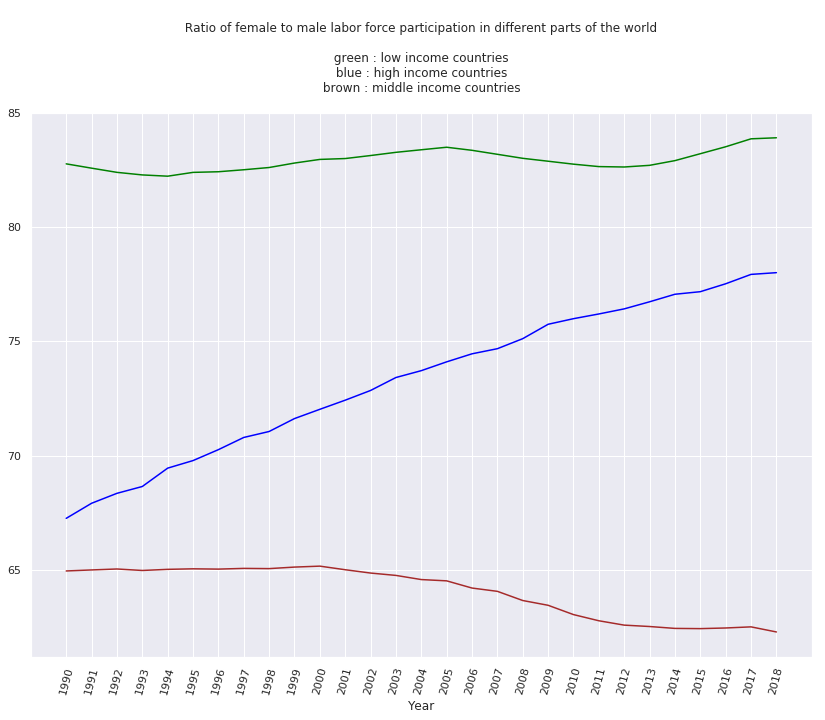

In [35]:
high_income.rename(columns = {'Ratio of female to male labor force participation rate (%) (modeled ILO estimate)':'Ratio of female to male labor force participation'},inplace=True)
middle_income.rename(columns = {'Ratio of female to male labor force participation rate (%) (modeled ILO estimate)':'Ratio of female to male labor force participation'},inplace=True)
low_income.rename(columns = {'Ratio of female to male labor force participation rate (%) (modeled ILO estimate)':'Ratio of female to male labor force participation'},inplace=True)
fig = plt.figure(figsize = (14, 10)) 
ax = fig.add_subplot(111)

sns.lineplot(x='Year',y='Ratio of female to male labor force participation',data=high_income, color = 'blue')
plt.xticks(rotation = 75)

sns.lineplot(x='Year',y='Ratio of female to male labor force participation',data=middle_income, color = 'brown')

sns.lineplot(x='Year',y='Ratio of female to male labor force participation',data=low_income, color = 'green')
plt.title('\n Ratio of female to male labor force participation in different parts of the world \n\n green : low income countries \n blue : high income countries \n brown : middle income countries \n')
plt.ylabel("")
plt.show()



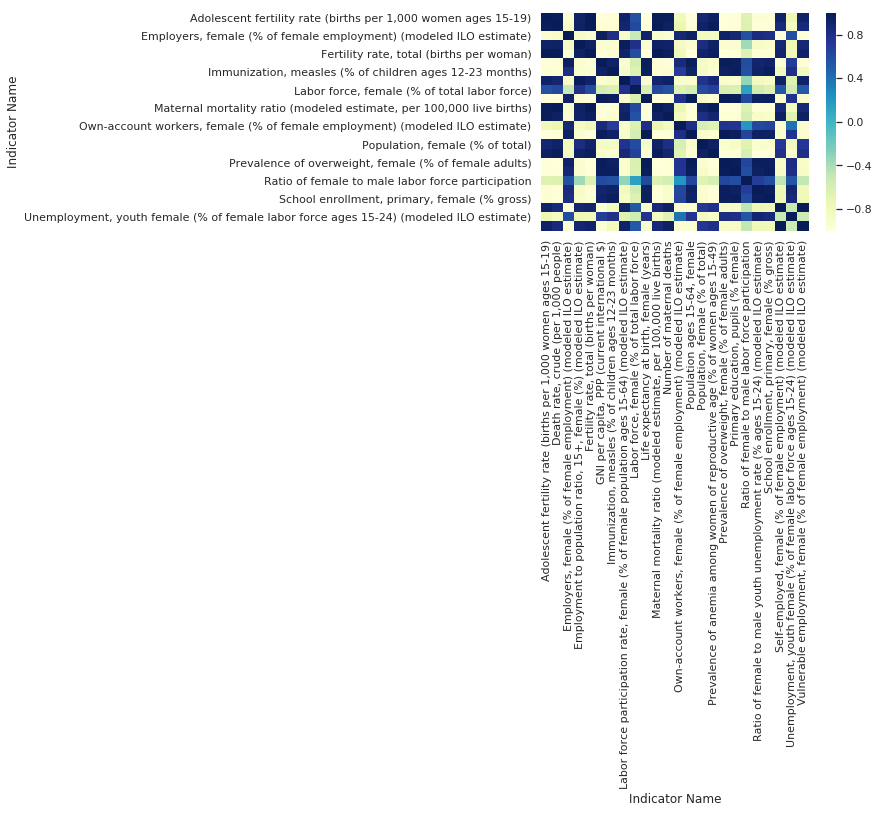

In [31]:
sns.heatmap((low_income.corr()), cmap='YlGnBu')

In [0]:
low_income.columns
low_income2 = low_income.filter(['Year','Employers, female (% of female employment) (modeled ILO estimate)',
  'Own-account workers, female (% of female employment) (modeled ILO estimate)',
  'Prevalence of overweight, female (% of female adults)',
  'Primary education, pupils (% female)',
  'Ratio of female to male labor force participation rate (%) (modeled ILO estimate)',
  'School enrollment, primary, female (% gross)',
  'Unemployment, youth female (% of female labor force ages 15-24) (modeled ILO estimate)',
  'Wage and salaried workers, female (% of female employment) (modeled ILO estimate)'],axis=1)

In [0]:
low_income2.corr()

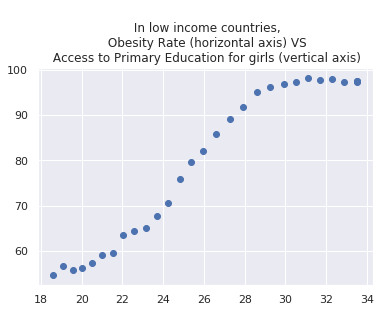

In [39]:
plt.scatter(x=low_income2['Prevalence of overweight, female (% of female adults)'], y=low_income2['School enrollment, primary, female (% gross)'])
plt.title('\n In low income countries,\n Obesity Rate (horizontal axis) VS\n Access to Primary Education for girls (vertical axis)')
plt.show()

In [0]:
plt.scatter(x=low_income2['Prevalence of overweight, female (% of female adults)'], y=low_income2['Employers, female (% of female employment) (modeled ILO estimate)'])
plt.title('\n In low income countries, the relationship between the obesity rate (horizontal axis) \n VS the share of women-entrepreneurs among the female labor force (vertical axis)')

plt. show()

In [0]:
latam = df1[df1.Region=='Latin America & Caribbean (excluding high income)']

In [0]:
latam = setting_frame(latam)
latam = latam.set_index('Year')


In [0]:
latam.columns

In [0]:
latam =latam.filter(['Labor force participation rate, female (% of female population ages 15-64) (modeled ILO estimate)',
'Ratio of female to male labor force participation rate (%) (modeled ILO estimate)',
'Self-employed, female (% of female employment) (modeled ILO estimate)',
                     'Unemployment, youth female (% of female labor force ages 15-24) (modeled ILO estimate)',
'Wage and salaried workers, female (% of female employment) (modeled ILO estimate)',
                    'Life expectancy at birth, female (years)','Primary education, pupils (% female)'],axis=1)


In [0]:
latam.rename(columns={'Labor force participation rate, female (% of female population ages 15-64) (modeled ILO estimate)':'Share of women in the total labor force',
'Ratio of female to male labor force participation rate (%) (modeled ILO estimate)':'Ratio of female to male labor force participation rate',
'Self-employed, female (% of female employment) (modeled ILO estimate)':'Female Freelancers',
                      'Unemployment, youth female (% of female labor force ages 15-24) (modeled ILO estimate)':'Share of women in the youth unemployment',
'Wage and salaried workers, female (% of female employment) (modeled ILO estimate)':'Share of female among salaried workers',
                     'Life expectancy at birth, female (years)':'Female life expectancy',
                     'Primary education, pupils (% female)':'Rate of primary school enrollment for girls'},inplace=True)

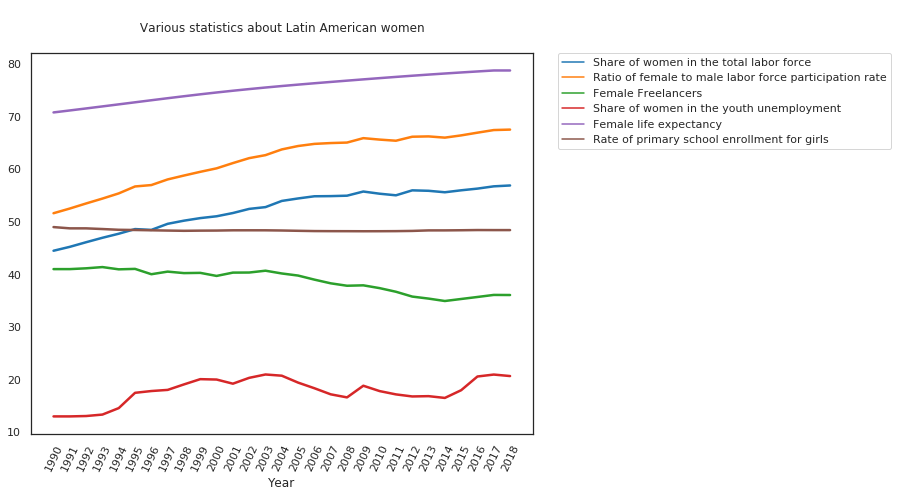

In [66]:
sns.set(style="white")
fig, ax = plt.subplots(figsize=(9,7))
sns.lineplot(ax=ax, data=latam, dashes=False, palette="tab10", linewidth=2.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('\n Various statistics about Latin American women \n')
plt.xticks(rotation = 65)
plt.show()

In [0]:
eu = df1[df1.Region=='European Union']
eu = setting_frame(eu)
eu.index = pd.DatetimeIndex(eu.Year)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


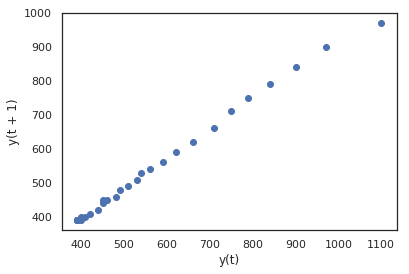

In [43]:
from pandas.plotting import lag_plot
lag_plot(eu['Number of maternal deaths'])
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


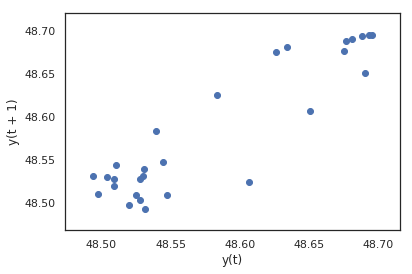

In [44]:
lag_plot(eu['Primary education, pupils (% female)'])

In [77]:
from statsmodels.tsa.ar_model import AR

train, test = eu['Number of maternal deaths'][:-15], eu['Number of maternal deaths'][-15:]
model = AR(eu['Number of maternal deaths'])
model_fit = model.fit(maxlag=1)
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


In [0]:
print(model_fit.params)

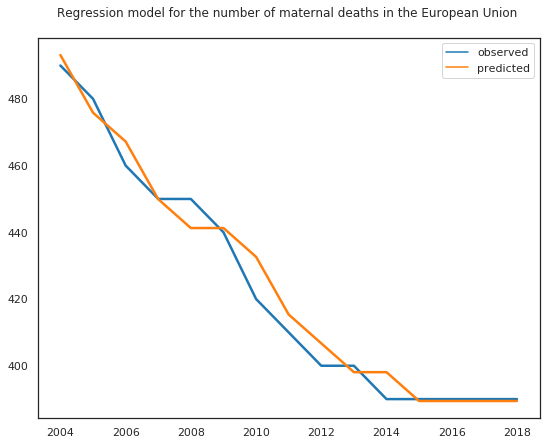

In [78]:
pred = pd.DataFrame({'observed':test, 'predicted':predictions})
fig, ax = plt.subplots(figsize=(9,7))
sns.lineplot(ax=ax, data=pred, dashes=False, palette="tab10", linewidth=2.5)
plt.title('Regression model for the number of maternal deaths in the European Union \n')
plt.show()

In [48]:
from statsmodels.tsa.stattools import adfuller

adfuller(eu['Number of maternal deaths'])[1]


4.59167342456152e-27

In [74]:
#moving average model
from statsmodels.tsa.arima_model import ARMA

model = ARMA(eu['Number of maternal deaths'], order=(0, 1))
model_fit = model.fit(disp=False)
predictions = model_fit.predict(len(eu['Number of maternal deaths'])-15, len(eu['Number of maternal deaths'])-1)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


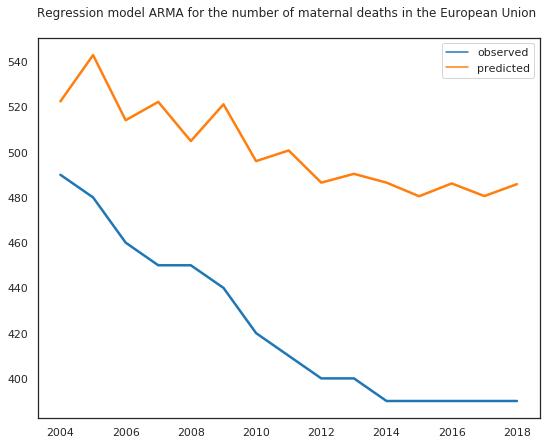

In [76]:
pred2 = pd.DataFrame({'observed':eu['Number of maternal deaths'][-15:], 'predicted':predictions})
fig, ax = plt.subplots(figsize=(9,7))
sns.lineplot(ax=ax, data=pred2, dashes=False, palette="tab10", linewidth=2.5)
plt.title('Regression model ARMA for the number of maternal deaths in the European Union \n')
plt.show()

In [0]:
model = ARMA(eu['Number of maternal deaths'], order=(2, 1))
model_fit = model.fit(disp=False)
# make prediction
predictions = model_fit.predict(len(eu['Number of maternal deaths'])-15, len(eu['Number of maternal deaths'])-1)

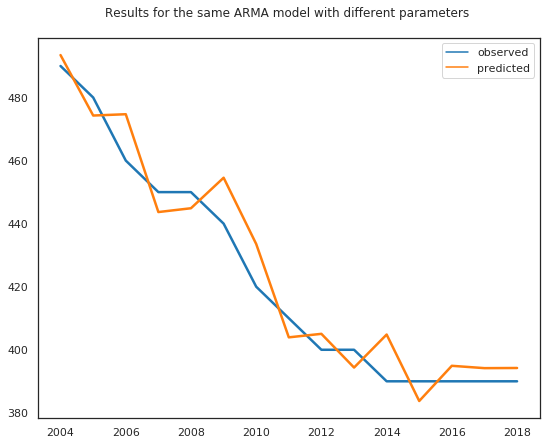

In [80]:
pred3 = pd.DataFrame({'observed':eu['Number of maternal deaths'][-15:], 'predicted':predictions})
fig, ax = plt.subplots(figsize=(9,7))
sns.lineplot(ax=ax, data=pred3, dashes=False, palette="tab10", linewidth=2.5)
plt.title('Results for the same ARMA model with different parameters \n')
plt.show()

In [59]:
model = ARMA(eu['Ratio of female to male youth unemployment rate (% ages 15-24) (modeled ILO estimate)'], order=(9, 0))
model_fit = model.fit(disp=False)
# make prediction
predictions = model_fit.predict(len(eu['Ratio of female to male youth unemployment rate (% ages 15-24) (modeled ILO estimate)'])-15, len(eu['Ratio of female to male youth unemployment rate (% ages 15-24) (modeled ILO estimate)'])-1)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [0]:
obs = pd.DataFrame({'observed':eu['Prevalence of overweight, female (% of female adults)'][-15:], 'predicted':predictions})
obs.plot()
plt.title('Results for an ARMA model with different parameters \n')

plt.show()

In [0]:
eu.columns

In [0]:
eu.rename(columns = {'Death rate, crude (per 1,000 people)':'Death_rate_1000',
                    'Fertility rate, total (births per woman)':'Fertility_rate',
                    'GNI per capita, PPP (current international $)':'Zone_GNI',
                    'Prevalence of overweight, female (% of female adults)':'Obesity_rate',
                    'Prevalence of anemia among women of reproductive age (% of women ages 15-49)':'Anemia_prevalence_women',
                    'Number of maternal deaths':'Number_maternal_deaths',
                    'Immunization, measles (% of children ages 12-23 months)':'Baby_measle_immunization',
                    'Labor force, female (% of total labor force)':'Share_women_labor_force',
                    'Adolescent fertility rate (births per 1,000 women ages 15-19)':'Adolescent_pregnancy_rate_1000'},inplace=True)


In [41]:
eu2 = eu[['Baby_measle_immunization', 'Anemia_prevalence_women']].copy()
eu2.shape

(29, 2)

In [42]:
testset = eu2
target = eu['Share_women_labor_force']

from sklearn.model_selection import train_test_split

#from sklearn.preprocessing import StandardScaler
#testset = StandardScaler().fit_transform(testset)
#testset = pd.DataFrame(testset)

#b = sm.add_constant(testset)
X_train, X_test, y_train, y_test = train_test_split(testset, target, test_size=0.2) 
model = sm.OLS(y_train, X_train)
results = model.fit()
print(results.summary())

                                   OLS Regression Results                                   
Dep. Variable:     Share_women_labor_force   R-squared (uncentered):                   1.000
Model:                                 OLS   Adj. R-squared (uncentered):              1.000
Method:                      Least Squares   F-statistic:                          3.979e+05
Date:                     Fri, 19 Jul 2019   Prob (F-statistic):                    8.41e-49
Time:                             10:20:16   Log-Likelihood:                          1.4207
No. Observations:                       23   AIC:                                      1.159
Df Residuals:                           21   BIC:                                      3.430
Df Model:                                2                                                  
Covariance Type:                 nonrobust                                                  
                               coef    std err          t      P>|t|  

In [43]:
from sklearn.metrics import r2_score
y_pred = results.predict(X_test)
r2_score(y_pred,y_test)

0.9243026443985223

In [47]:
eu3 = eu[['Adolescent_pregnancy_rate_1000','Death_rate_1000','Zone_GNI', 'Anemia_prevalence_women']].copy()

testset = eu3
target = eu['Share_women_labor_force']

X_train, X_test, y_train, y_test = train_test_split(testset, target, test_size=0.2) 
model = sm.OLS(y_train, X_train)
results = model.fit()
print(results.summary())


                                   OLS Regression Results                                   
Dep. Variable:     Share_women_labor_force   R-squared (uncentered):                   1.000
Model:                                 OLS   Adj. R-squared (uncentered):              1.000
Method:                      Least Squares   F-statistic:                          6.921e+04
Date:                     Fri, 19 Jul 2019   Prob (F-statistic):                    2.94e-39
Time:                             10:24:34   Log-Likelihood:                         -9.4273
No. Observations:                       23   AIC:                                      26.85
Df Residuals:                           19   BIC:                                      31.40
Df Model:                                4                                                  
Covariance Type:                 nonrobust                                                  
                                     coef    std err          t      P

In [48]:
y_pred = results.predict(X_test)
r2_score(y_pred,y_test)

0.63284344740665

In [0]:
ArabWorld = df1[df1['Region']=='Arab World']
ArabWorld = setting_frame(ArabWorld)

In [0]:
Pacific_Asia = df1[df1['Region']=='East Asia & Pacific']
Pacific_Asia = setting_frame(Pacific_Asia)

In [0]:
ArabWorld.rename(columns = {'Death rate, crude (per 1,000 people)':'Death_rate_1000',
                    'Labor force participation rate, female (% of female population ages 15-64) (modeled ILO estimate)':'Share_women_labor_force',
                    'GNI per capita, PPP (current international $)':'Zone_GNI',
                    'Immunization, measles (% of children ages 12-23 months)':'Baby_measle_immunization',
                    'Prevalence of anemia among women of reproductive age (% of women ages 15-49)':'Anemia_prevalence_women',
                    'Number of maternal deaths':'Number_maternal_deaths',
                           'Primary education, pupils (% female)':'Primary_education',
                           'Life expectancy at birth, female (years)':'Life_expectancy',
                           'Fertility rate, total (births per woman)':'Fertility_rate'},inplace=True)

In [85]:
aw = ArabWorld[['Primary_education','Death_rate_1000','Zone_GNI']].copy()
testset = aw
target = ArabWorld['Share_women_labor_force']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(testset, target, test_size=0.2) 
model = sm.OLS(y_train, X_train)
results = model.fit()
print(results.summary())

                                   OLS Regression Results                                   
Dep. Variable:     Share_women_labor_force   R-squared (uncentered):                   1.000
Model:                                 OLS   Adj. R-squared (uncentered):              1.000
Method:                      Least Squares   F-statistic:                          4.244e+04
Date:                     Fri, 19 Jul 2019   Prob (F-statistic):                    3.38e-38
Time:                             13:53:40   Log-Likelihood:                         -1.9502
No. Observations:                       23   AIC:                                      9.900
Df Residuals:                           20   BIC:                                      13.31
Df Model:                                3                                                  
Covariance Type:                 nonrobust                                                  
                        coef    std err          t      P>|t|      [0.

In [87]:
from sklearn.metrics import r2_score
y_pred = results.predict(X_test)
r2_score(y_pred,y_test)

0.9129701370111352

In [88]:
aw2 = ArabWorld[['Life_expectancy','Fertility_rate']].copy()

testset = aw2
target = ArabWorld['Share_women_labor_force']

X_train, X_test, y_train, y_test = train_test_split(testset, target, test_size=0.2) 
model = sm.OLS(y_train, X_train)
results = model.fit()
print(results.summary())

                                   OLS Regression Results                                   
Dep. Variable:     Share_women_labor_force   R-squared (uncentered):                   1.000
Model:                                 OLS   Adj. R-squared (uncentered):              1.000
Method:                      Least Squares   F-statistic:                          6.027e+04
Date:                     Fri, 19 Jul 2019   Prob (F-statistic):                    3.40e-40
Time:                             13:54:28   Log-Likelihood:                         -3.2370
No. Observations:                       23   AIC:                                      10.47
Df Residuals:                           21   BIC:                                      12.75
Df Model:                                2                                                  
Covariance Type:                 nonrobust                                                  
                      coef    std err          t      P>|t|      [0.02

In [89]:
y_pred = results.predict(X_test)
r2_score(y_pred,y_test)

0.359459606048406

In [0]:
ArabWorld.rename(columns={'Adolescent fertility rate (births per 1,000 women ages 15-19)':'Adolescent_fertility_rate'}, inplace=True)
Pacific_Asia.rename(columns={'Adolescent fertility rate (births per 1,000 women ages 15-19)':'Adolescent_fertility_rate'}, inplace=True)

In [0]:
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
#X, y = make_friedman1(n_samples=50, n_features=10, random_state=0)
#estimator = SVR(kernel="linear")
#selector = RFE(estimator, 5, step=1)
#selector = selector.fit(testset, target)

#selector.ranking_

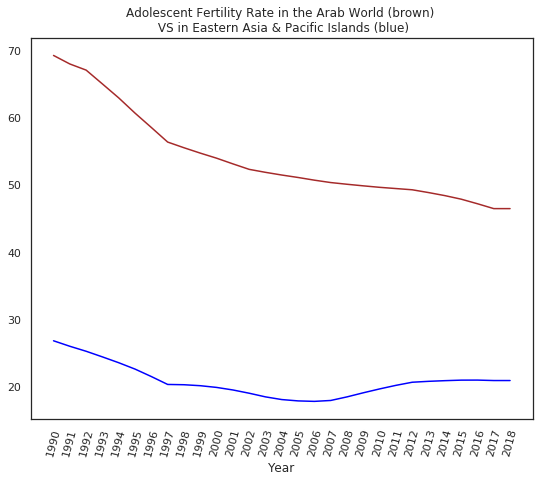

In [91]:
fig = plt.figure(figsize = (9, 7)) 
ax = fig.add_subplot(111)

sns.lineplot(x='Year',y='Adolescent_fertility_rate',data=ArabWorld, color = 'brown')
plt.xticks(rotation = 75)

sns.lineplot(x='Year',y='Adolescent_fertility_rate',data=Pacific_Asia, color = 'blue')
plt.title('Adolescent Fertility Rate in the Arab World (brown) \n VS in Eastern Asia & Pacific Islands (blue)')
plt.ylabel("")
plt.show()

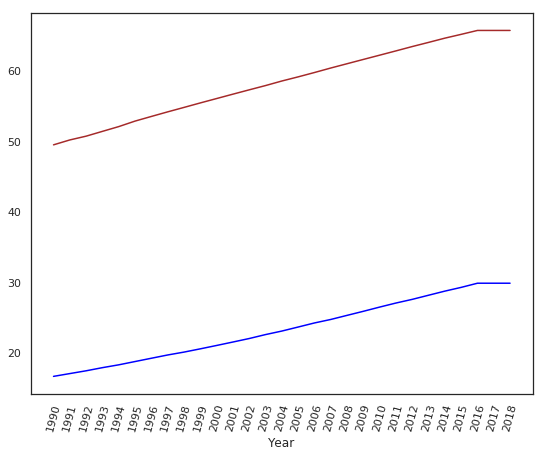

In [94]:
fig = plt.figure(figsize = (9, 7)) 
ax = fig.add_subplot(111)

sns.lineplot(x='Year',y='Prevalence of overweight, female (% of female adults)',data=ArabWorld, color = 'brown')
plt.xticks(rotation = 75)

sns.lineplot(x='Year',y='Prevalence of overweight, female (% of female adults)',data=Pacific_Asia, color = 'blue')
plt.ylabel("")
plt.show()

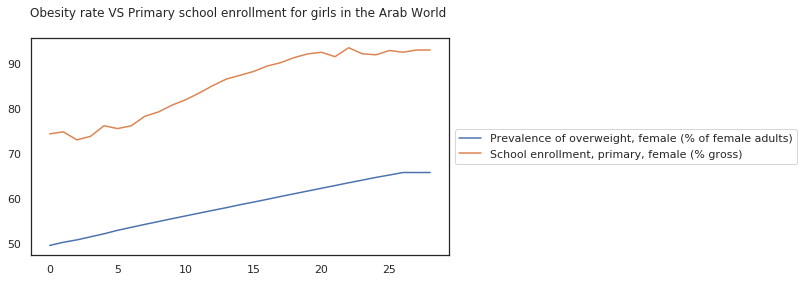

In [96]:
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(ArabWorld['Prevalence of overweight, female (% of female adults)'])
ax.plot(ArabWorld['School enrollment, primary, female (% gross)'] )
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 1.25, box.height])

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Obesity rate VS Primary school enrollment for girls in the Arab World \n')
plt.show()

In [0]:
India = pd.read_csv('Gender_StatsData.csv')

In [0]:
India = India[India['Country Name'] == 'India']

India['full_count'] = India.apply(lambda x: x.count(), axis=1)
India = India.drop(['Country Code','Indicator Code','Unnamed: 63'],axis=1)

In [0]:
India = India[India['full_count']>=60]

In [0]:
India['1961'].fillna(India['1962'], inplace=True)
India['1960'].fillna(India['1961'], inplace=True)
India['2018'].fillna(India['2017'], inplace=True)
India.rename(columns = {'Country Name':'Region'},inplace=True)
India = India.drop('full_count',axis=1)

India = setting_frame(India)


In [0]:
testset = India[['GDP per capita (Current US$)','Fertility rate, total (births per woman)',
                'Population ages 15-64 (% of total)']].copy()
target = India['Life expectancy at birth, female (years)']

In [153]:

X_train, X_test, y_train, y_test = train_test_split(testset, target, test_size=0.25) 
model = sm.OLS(y_train, X_train)
results = model.fit()
print(results.summary())

                                            OLS Regression Results                                           
Dep. Variable:     Life expectancy at birth, female (years)   R-squared (uncentered):                   0.999
Model:                                                  OLS   Adj. R-squared (uncentered):              0.999
Method:                                       Least Squares   F-statistic:                          1.564e+04
Date:                                      Fri, 19 Jul 2019   Prob (F-statistic):                    1.01e-62
Time:                                              14:46:39   Log-Likelihood:                         -85.606
No. Observations:                                        44   AIC:                                      177.2
Df Residuals:                                            41   BIC:                                      182.6
Df Model:                                                 3                                                  
Covariance

In [154]:
y_pred = results.predict(X_test)
r2_score(y_pred,y_test)

0.9716120504318736

In [163]:
pred4 = pd.DataFrame({'observed':y_test, 'predicted':y_pred})
pred4 = pred4.reset_index()
pred4 = pred4.sort_values('index')
pred4 = pred4.drop('index',axis=1)
pred4 = pred4.reset_index()
pred4 = pred4.drop('index',axis=1)

pred4

,observed,predicted
0,41.663,45.293023
1,44.319,44.828101
2,47.869,47.153992
3,52.187,50.526385
4,53.404,51.578526
5,56.389,54.684530
6,56.801,55.149298
7,63.438,64.689265
8,63.841,65.409351
9,64.234,66.105362


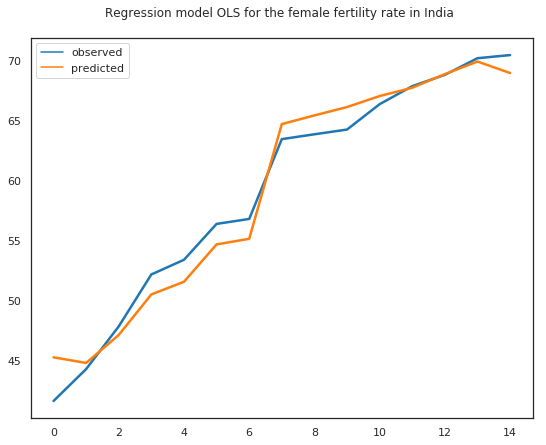

In [165]:
fig, ax = plt.subplots(figsize=(9,7))
sns.lineplot(ax=ax, data=pred4, dashes=False, palette="tab10", linewidth=2.5)
plt.title('Regression model OLS for the female fertility rate in India \n')
plt.show()